# CS765 PROJECT

### Demo from https://github.com/Axelrod-Python/Axelrod

In [22]:
# install the requirements.txt, if you have an error install axelrod-dojo first, with instructions below
# pip install -r requirements.txt

In [23]:
import truth as tr

In [24]:
truth = tr.Truth()

In [25]:
import axelrod as axl
import matplotlib.pyplot as plt

In [26]:
players = [s() for s in axl.demo_strategies]  # Create players
players += [truth]
# Strategies from the demo:
players

[Cooperator, Defector, Tit For Tat, Grudger, Random: 0.5, Truth: C]

In [27]:
tournament = axl.Tournament(players, turns=200, repetitions=500, seed=42)  # Create a tournament
# results = tournament.play(processes=0)  # Play the tournament
results = tournament.play()  # Play the tournament Multicore


Analysing: 100%|██████████| 25/25 [00:01<00:00, 22.15it/s]


In [28]:
results.ranked_names

['Defector', 'Grudger', 'Tit For Tat', 'Random: 0.5', 'Cooperator', 'Truth: C']

In [16]:
plot = axl.Plot(results)


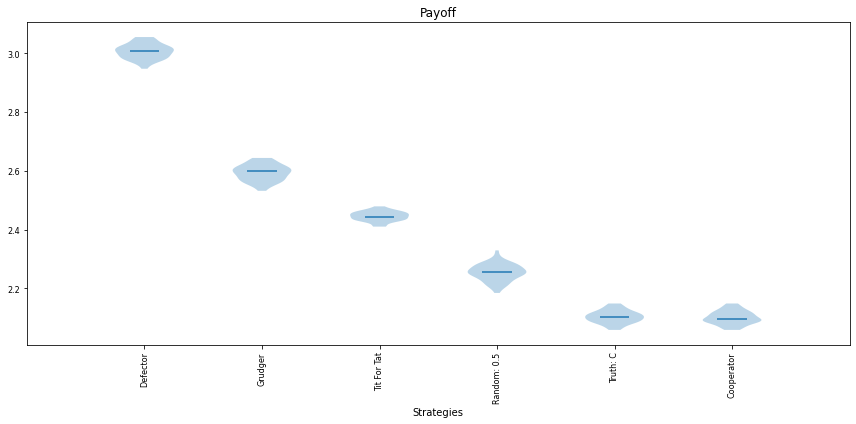

In [17]:
# set up plot labels
_, ax = plt.subplots()
ax.set_title('Payoff')
ax.set_xlabel('Strategies')
# draw the plot
p = plot.boxplot(ax=ax)

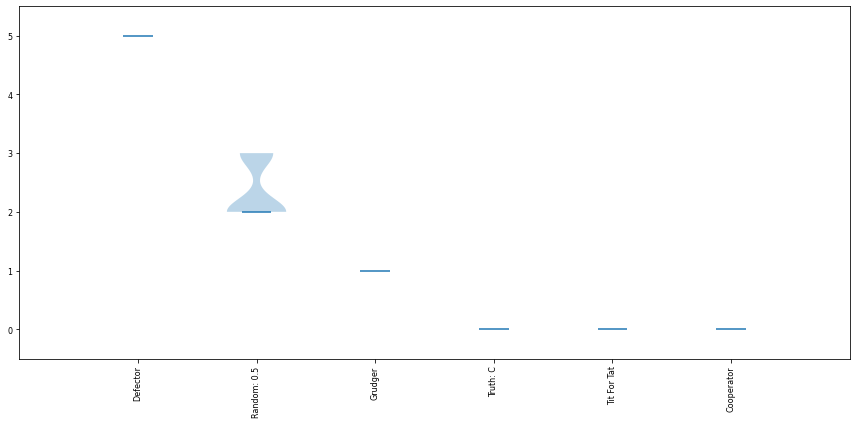

In [18]:
# Visualising the distributions of wins
p = plot.winplot()

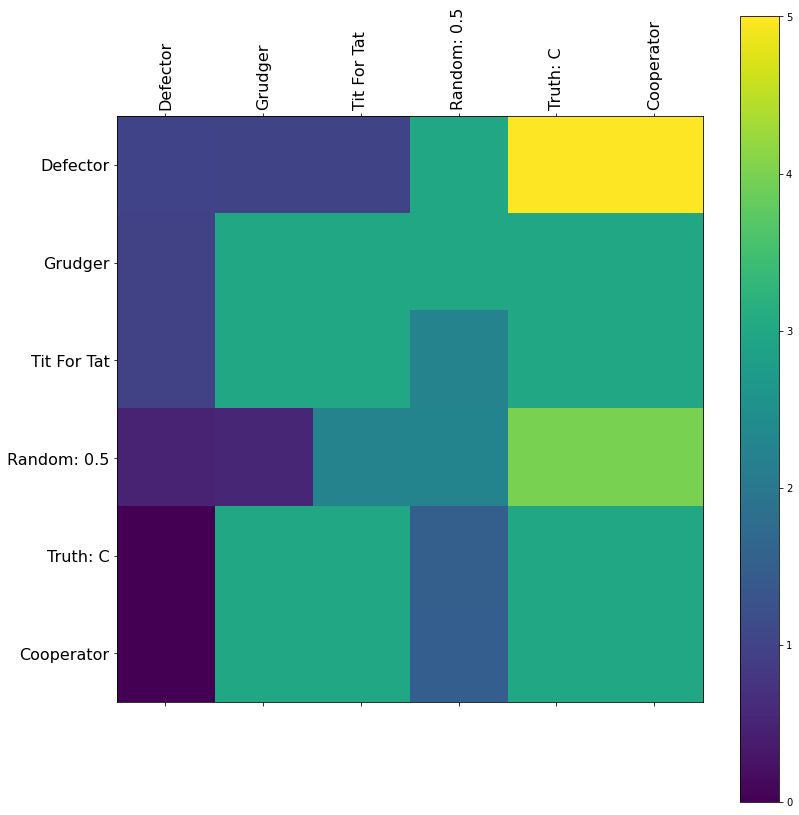

In [19]:
# Visualising the payoff matrix
p = plot.payoff()

### Axelrod Dojo
To install axelrod dojo: <br>
>
`cd axelrod-dojo-master` <br>
`python setup.py develop` <br> 
>
You can also try: <br>
>
`pip install axelrod_dojo` <br>
>
but for me it didn't work, I recieved error, probably because I'm on python 3.10

In [ ]:
import axelrod_dojo as dojo

#### Tutorial from Axelrod-Dojo

In [ ]:
#opponents = [axl.TitForTat(), axl.Alternator(), axl.Defector()]
opponents = [s() for s in axl.short_run_time_strategies[:10]]
opponents


In [ ]:
# We are now going to prepare the training algorithm. First of all, we need to prepare the 
# objective of our strategy. 
# In this case we will aim to maximise score in a match with 10 turns over 1 repetition:

objective = dojo.prepare_objective(name="score", turns=100, repetitions=10)

In [ ]:
# The algorithm we are going to use is a genetic algorithm which requires a population of individuals. 
# Let us set up the inputs:

params_class = axl.EvolvableFSMPlayer
params_kwargs = {"num_states": 50, "seed":35678845}


In [ ]:
population = dojo.Population(player_class=params_class,
                                params_kwargs=params_kwargs,
                                size=20,
                                objective=objective,
                                output_filename="training_output.csv",
                                opponents=opponents,
                                mutation_probability=.25
                            )

In [ ]:
generations = 10
population.run(generations)


In [ ]:
population.population

In [ ]:
GA_player = population.population[0]
GA_player.__repr__()

In [ ]:
players = opponents + [GA_player]
players



In [ ]:
tournament = axl.Tournament(players, turns=100, repetitions=100, seed=42)  # Create a tournament
results = tournament.play(processes=0)  # Play the tournament

In [ ]:
plot = axl.Plot(results)

In [ ]:
for i in range(len(results.ranked_names)):
    results.ranked_names[i] = results.ranked_names[i].split(':')[0]
results.ranked_names



In [ ]:
for i in range(len(plot.players)):
    plot.players[i] = plot.players[i].split(':')[0]
plot.players

In [ ]:
p = plot.boxplot()


In [ ]:
# Visualising the distributions of wins
p = plot.winplot()

In [ ]:
p = plot.payoff()

In [ ]:
population.run(generations)

In [ ]:
class 